In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [ ]:
df = load_iris()

In [ ]:
X = df.data
y = df.target

In [ ]:
z = list(zip(X, y))
X = np.array([list(i) for i, j in z if j != 0])
y = np.array([j for i, j in z if j != 0])

In [ ]:
X

array([[7. , 3.2, 4.7, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 4.9, 1.5],
       [5.5, 2.3, 4. , 1.3],
       [6.5, 2.8, 4.6, 1.5],
       [5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4],
       [5. , 2. , 3.5, 1. ],
       [5.9, 3. , 4.2, 1.5],
       [6. , 2.2, 4. , 1. ],
       [6.1, 2.9, 4.7, 1.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.7, 3.1, 4.4, 1.4],
       [5.6, 3. , 4.5, 1.5],
       [5.8, 2.7, 4.1, 1. ],
       [6.2, 2.2, 4.5, 1.5],
       [5.6, 2.5, 3.9, 1.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.1, 2.8, 4. , 1.3],
       [6.3, 2.5, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.4, 2.9, 4.3, 1.3],
       [6.6, 3. , 4.4, 1.4],
       [6.8, 2.8, 4.8, 1.4],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.9, 4.5, 1.5],
       [5.7, 2.6, 3.5, 1. ],
       [5.5, 2.4, 3.8, 1.1],
       [5.5, 2.4, 3.7, 1. ],
       [5.8, 2.7, 3.9, 1.2],
       [6. , 2.7, 5.1, 1.6],
       [5.4, 3

In [ ]:
y = y[:, np.newaxis]
y = y - 1
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
def sigmoid(y):
    return 1 / (1 + np.exp(-y))

def logloss(X, y, theta):
    h = sigmoid(X @ theta)
    epsilon = 1e-30
    logloss_total = (((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon))) / len(y)
    return logloss_total

def gr_logloss(X, y, params, learning_rate, iterations):
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate / len(y)) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = logloss(X, y, params)

    return (cost_history, params)

def predict(X, params):
    return np.round(sigmoid(X @ params))

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([ 3.28848060e-15, -3.63598041e-15, -5.42066392e-16, -1.28397293e-15]),
 array([1., 1., 1., 1.]))

Initial Cost is: [[0.69314718]] 

Optimal Parameters are: 
 [[ 0.11554929]
 [-0.12789956]
 [-0.63703006]
 [ 2.22295606]
 [ 2.57331816]] 



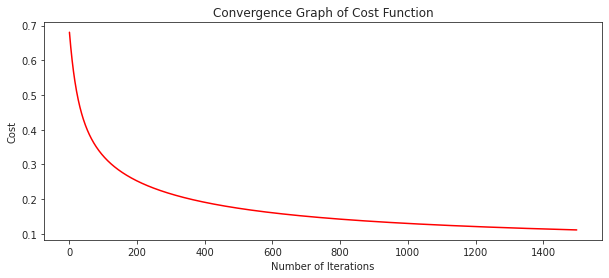

In [ ]:
X = np.hstack((np.ones((len(y), 1)), X))
n = np.size(X, 1)
params = np.zeros((n, 1))

iterations = 1500
learning_rate = 0.03

initial_cost = logloss(X, y, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gr_logloss(X, y, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure(figsize=(10, 4))
sns.set_style('ticks')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [ ]:
y_pred = predict(X, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

0.96
